In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    # Ruta al archivo CSV
    ruta_csv = r"/Users/barbarajunqueira/ProjecteData/Equip_16/Data/banca_22.09_dataset.csv"

    # Cargar el CSV en un DataFrame
    df_bank = pd.read_csv(ruta_csv, sep=',', encoding='utf-8')  # usa sep="," si el separador es coma

    print("✅ CSV cargado correctamente.")
    print(df_bank.head())

    # Guardar copia en otra ruta (si querés exportarlo)
    df_bank.to_csv(r"/Users/barbarajunqueira/Desktop/simulacio/dataset_23092025.csv", index=False)
    print("✅ CSV guardado correctamente.")

except Exception as e:
    print(f"❌ Error al trabajar con el CSV: {e}")


✅ CSV cargado correctamente.
   id   age         job  marital  education default  balance housing loan  \
0   1  59.0      admin.  married  secondary      no     2343     yes   no   
1   2  56.0      admin.  married  secondary      no       45      no   no   
2   3  41.0  technician  married  secondary      no     1270     yes   no   
3   4  55.0    services  married  secondary      no     2476     yes   no   
4   5  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may      1042         1     -1         0  unknown     yes   
1  unknown    5   may      1467         1     -1         0  unknown     yes   
2  unknown    5   may      1389         1     -1         0  unknown     yes   
3  unknown    5   may       579         1     -1         0  unknown     yes   
4  unknown    5   may       673         2     -1         0  unknown     yes   

  Clase de edad           Perfil 

In [4]:
df = df_bank.copy()

df['Grupo'] = df.apply(lambda row: 
                       '00 - Sin préstamo ni hipoteca' if row['loan'] == 'no' and row['housing'] == 'no' else
                       '01 - Solo Hipoteca' if row['loan'] == 'no' and row['housing'] == 'yes' else
                       '10 - Solo Préstamo' if row['loan'] == 'yes' and row['housing'] == 'no' else
                       '11 - Préstamo + Hipoteca', axis=1)

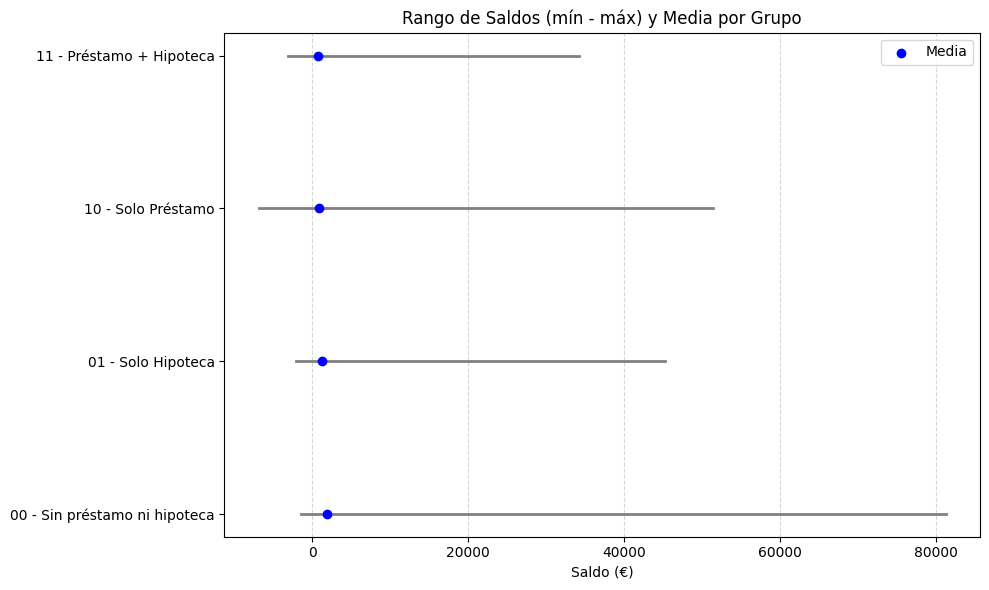

In [5]:
# Agregamos estadísticas por grupo
saldos_stats = df.groupby('Grupo')['balance'].agg(['min', 'max', 'mean']).reset_index()

# Orden opcional por grupo
orden = ['00 - Sin préstamo ni hipoteca', '01 - Solo Hipoteca', '10 - Solo Préstamo', '11 - Préstamo + Hipoteca']
saldos_stats['Grupo'] = pd.Categorical(saldos_stats['Grupo'], categories=orden, ordered=True)
saldos_stats = saldos_stats.sort_values('Grupo')

# Plot
plt.figure(figsize=(10, 6))
for i, row in saldos_stats.iterrows():
    plt.plot([row['min'], row['max']], [i, i], color='gray', linewidth=2)
    plt.scatter(row['mean'], i, color='blue', label='Media' if i == 0 else "", zorder=5)

plt.yticks(range(len(saldos_stats)), saldos_stats['Grupo'])
plt.xlabel('Saldo (€)')
plt.title('Rango de Saldos (mín - máx) y Media por Grupo')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/y0/7f28l5651dd29dl8fv5rq_nw0000gn/T/ipykernel_98469/649047923.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=riesgo_stats, x='Riesgo (%)', y='Grupo', palette='coolwarm')


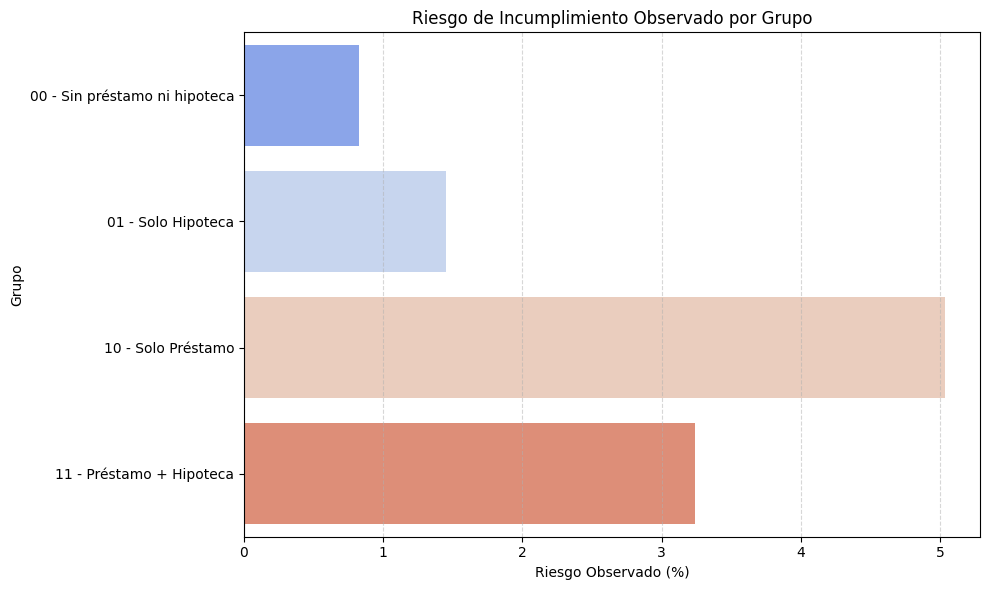

In [11]:
# Convertir 'default' en binaria
df['default_bin'] = df['default'].map({'yes': 1, 'no': 0})

# Riesgo por grupo
riesgo_stats = df.groupby('Grupo')['default_bin'].mean().reset_index()
riesgo_stats['Riesgo (%)'] = riesgo_stats['default_bin'] * 100

# Aseguramos el orden
riesgo_stats['Grupo'] = pd.Categorical(riesgo_stats['Grupo'], categories=orden, ordered=True)
riesgo_stats = riesgo_stats.sort_values('Grupo')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=riesgo_stats, x='Riesgo (%)', y='Grupo', palette='coolwarm')
plt.title('Riesgo de Incumplimiento Observado por Grupo')
plt.xlabel('Riesgo Observado (%)')
plt.ylabel('Grupo')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
# Crear variables binarias necesarias
df['loan_bin'] = (df['loan'] == 'yes').astype(int)
df['housing_bin'] = (df['housing'] == 'yes').astype(int)
df['default_bin'] = (df['default'] == 'yes').astype(int)
df['deposit_bin'] = (df['deposit'] == 'yes').astype(int)
df

,id,age,job,marital,education,default,balance,housing,loan,contact,...,previous,poutcome,deposit,Clase de edad,Perfil,Grupo,default_bin,loan_bin,housing_bin,deposit_bin
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,0,unknown,yes,55-64,Gen Z & Boomers,01 - Solo Hipoteca,0,0,1,1
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,0,unknown,yes,55-64,Gen Z & Boomers,00 - Sin préstamo ni hipoteca,0,0,0,1
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,0,unknown,yes,35-44,Adultxs,01 - Solo Hipoteca,0,0,1,1
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,0,unknown,yes,55-64,Gen Z & Boomers,01 - Solo Hipoteca,0,0,1,1
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,0,unknown,yes,45-54,Divorciadxs,00 - Sin préstamo ni hipoteca,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16157,21379,47.0,technician,divorced,secondary,no,236,no,no,cellular,...,0,unknown,no,45-54,Divorciadxs,00 - Sin préstamo ni hipoteca,0,0,0,0
16158,21380,33.0,management,married,tertiary,no,6513,yes,no,cellular,...,1,other,yes,25-34,Millenials,01 - Solo Hipoteca,0,0,1,1
16159,21381,42.0,admin.,married,secondary,no,329,no,no,cellular,...,0,unknown,no,35-44,Adultxs,00 - Sin préstamo ni hipoteca,0,0,0,0
16160,21382,31.0,services,married,secondary,no,593,yes,no,cellular,...,0,unknown,no,25-34,Millenials,01 - Solo Hipoteca,0,0,1,0


In [14]:
def clasificar_balance(balance):
    if balance < 0:
        return 'Negativo'
    elif 0 <= balance <= 550:
        return 'Bajo'
    elif 551 <= balance <= 1708:
        return 'Medio'
    else:
        return 'Alto'

# Crear columna BalanceGroup
df['BalanceGroup'] = df['balance'].apply(clasificar_balance)

In [15]:
df['BalanceGroup'].value_counts(normalize=True) * 100

BalanceGroup
Bajo        43.961143
Medio       24.916471
Alto        24.879347
Negativo     6.243039
Name: proportion, dtype: float64

In [16]:
balance_pesos = {
    'Negativo': 0.0,
    'Bajo': 0.33,
    'Medio': 0.66,
    'Alto': 1.0
}

df['Grupo de saldo'] = df['BalanceGroup'].map(balance_pesos)

Score Original

In [20]:
df['score_original'] = (
    0.40 * df['Grupo de saldo'] +
    0.25 * df['default_bin'] +
    0.15 * df['loan_bin'] +
    0.15 * df['housing_bin'] +
    0.05 * df['deposit_bin']
)

Score Ajustado

In [21]:
df['score_ajustado'] = (
    0.40 * df['Grupo de saldo'] +
    0.25 * df['default_bin'] +
    0.20 * df['loan_bin'] +
    0.10 * df['housing_bin'] +
    0.05 * df['deposit_bin']
)

Score Interactivo

In [17]:
def housing_interactivo(row):
    if row['loan_bin'] == 1 and row['housing_bin'] == 1:
        return -0.10  # hipoteca atenúa el riesgo del préstamo
    elif row['loan_bin'] == 0 and row['housing_bin'] == 1:
        return 0.10   # hipoteca aumenta el riesgo sin préstamo
    else:
        return 0.0

df['score_interactivo'] = (
    0.40 * df['Grupo de saldo'] +
    0.25 * df['default_bin'] +
    0.20 * df['loan_bin'] +
    df.apply(housing_interactivo, axis=1) +
    0.05 * df['deposit_bin']
)


Grupos combinados de préstamo/hipoteca

In [18]:
df['Grupo'] = df.apply(lambda row: 
    '00 - Sin préstamo ni hipoteca' if row['loan_bin'] == 0 and row['housing_bin'] == 0 else
    '01 - Solo Hipoteca' if row['loan_bin'] == 0 and row['housing_bin'] == 1 else
    '10 - Solo Préstamo' if row['loan_bin'] == 1 and row['housing_bin'] == 0 else
    '11 - Préstamo + Hipoteca', axis=1)


Comparativa

In [ ]:
# Calcular riesgo observado y scores medios por grupo
tabla = df.groupby('Grupo')[['score_original', 'score_ajustado', 'score_interactivo']].mean().reset_index()
tabla['riesgo_observado'] = df.groupby('Grupo')['default_bin'].mean().values * 100

# Reordenar columnas para claridad
tabla = tabla[['Grupo', 'riesgo_observado', 'score_original', 'score_ajustado', 'score_interactivo']]

Gráfico de barras: Score promedio por grupo y fórmula

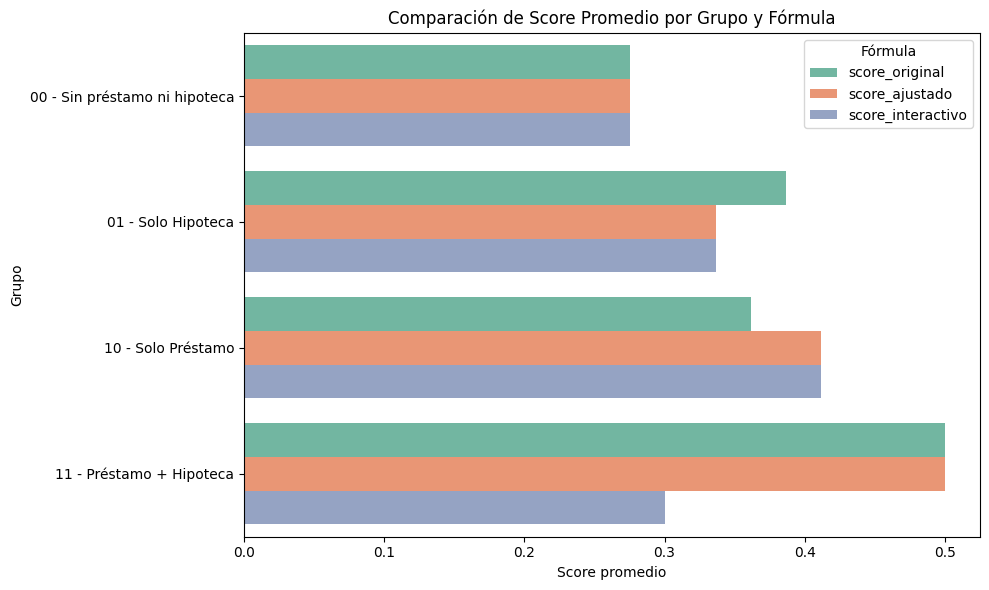

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla_melt = tabla.melt(id_vars='Grupo', 
                        value_vars=['score_original', 'score_ajustado', 'score_interactivo'],
                        var_name='Fórmula', value_name='Score promedio')

plt.figure(figsize=(10, 6))
sns.barplot(data=tabla_melt, x='Score promedio', y='Grupo', hue='Fórmula', palette='Set2')
plt.title('Comparación de Score Promedio por Grupo y Fórmula')
plt.tight_layout()
plt.show()


Gráfico de líneas: Score vs Riesgo Observado

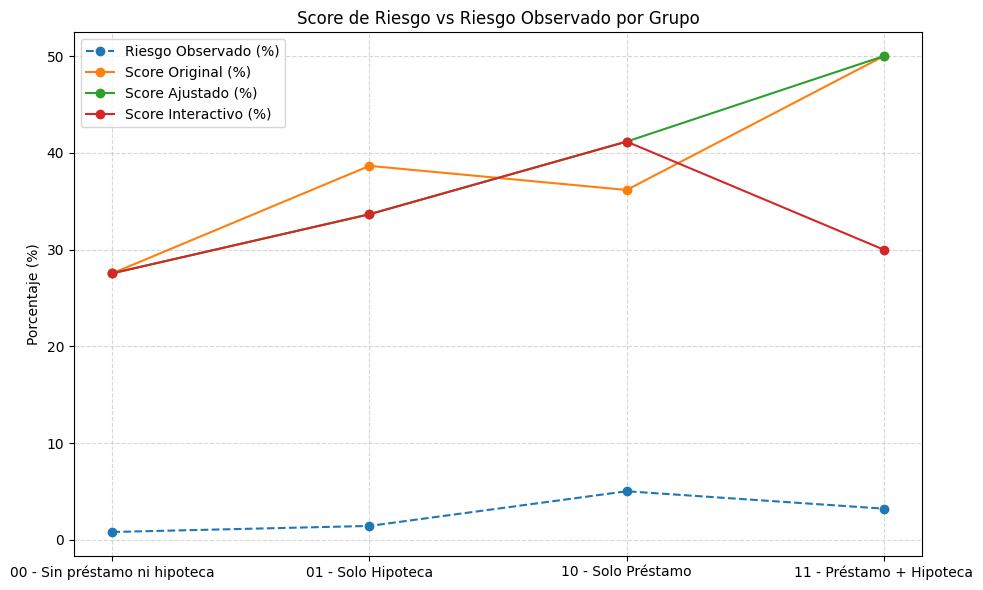

In [24]:
plt.figure(figsize=(10,6))
plt.plot(tabla['Grupo'], tabla['riesgo_observado'], label='Riesgo Observado (%)', marker='o', linestyle='--')
plt.plot(tabla['Grupo'], tabla['score_original'] * 100, label='Score Original (%)', marker='o')
plt.plot(tabla['Grupo'], tabla['score_ajustado'] * 100, label='Score Ajustado (%)', marker='o')
plt.plot(tabla['Grupo'], tabla['score_interactivo'] * 100, label='Score Interactivo (%)', marker='o')

plt.ylabel('Porcentaje (%)')
plt.title('Score de Riesgo vs Riesgo Observado por Grupo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
